# Лабораторная работа №1.  ДВПФ и ДПФ

# Модуль 1. Свойства ДВПФ.

## Задача 1.1. ДВПФ и взвешивание гармонического сигнала окном


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:| 
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |
|$n_0$|  3 |  5 |  2 |  5 |  4 |  6 |  7 |  7 |  5 |  5 |


Найти аналитически ДВПФ $N$ - точечных последовательностей
$$x[k]=\sum_{m=0}^{N-1}\mathbf{1}[k-m]\;\;\;\;y[k]=x[k]\cos\left(2\pi k\dfrac{n_0}{N}\right)$$  

Построить графики последовательностей $x[k]$ и $y[k]$.
Изобразить графики модуля ДВПФ для частот $\nu \in [-0.5, \; 0.5]$
* а) используя полученные аналитические формулы;
* б) используя функцию ```np.fft.fft()```.

Сравнить полученные результаты. 

In [3]:
import numpy as np
import scipy
import time
import matplotlib.pyplot as plt

def dtft(x, M=1024):
    return -0.5 + np.arange(M)/M, np.fft.fftshift(np.fft.fft(x, M))

def plot_dtft(signal, N=1024, use_stem=False, title = "", x_label = "", y_label = ""):
    nu, signal_dtft = dtft(signal, N)
    if use_stem:
        plt.stem(nu, np.abs(signal_dtft))
    else:
        plt.plot(nu, np.abs(signal_dtft))

    if title != "":
        plt.title(title)
    if x_label != "":
        plt.xlabel(x_label)
    if y_label != "":
        plt.ylabel(y_label)
    plt.show()
    return nu, signal_dtft



In [76]:
def analytical(nu, N):
    X_analytical = np.zeros(nu.size, dtype=np.complex128)
    non_zero_nu = nu[nu != 0]
    X_analytical[nu != 0] = np.exp(-1j * (N - 1) * np.pi * non_zero_nu) * np.divide(np.sin(np.pi * N * non_zero_nu), np.sin(np.pi * non_zero_nu))
    X_analytical[nu == 0] = N
    return X_analytical


def task_1_1():
    N = 20
    n_0 = 7

    x_time = np.full(N, 1)
    k_values = np.arange(N)
    cos_discret = np.cos(k_values * 2 * np.pi * n_0 / N)
    y_time = x_time * cos_discret
    nu_values = np.arange(-0.5, 0.5, 1 / (10 * N))

 
    k_values_for_analytical = np.arange(0, N, 1/10)
    X_analytical = analytical((k_values_for_analytical) / N, N)
    X_analytical = np.fft.fftshift(X_analytical)
    plt.plot(nu_values, np.abs(X_analytical))
    plt.title("Analytical X[k]")
    plt.xlabel("nu values")
    plt.ylabel("abs(X[k])")
    plt.show()
    
    Y_analytical = analytical((k_values_for_analytical - n_0) / N, N) / 2 + analytical((k_values_for_analytical + n_0) / N, N) / 2
    Y_analytical = np.fft.fftshift(Y_analytical)
    plt.plot(nu_values, np.abs(Y_analytical))
    plt.title("Analytical Y[k]")
    plt.xlabel("nu values")
    plt.ylabel("abs(Y[k])")
    plt.show()

    plot_dtft(x_time, title="X[k] by fft", x_label="nu values", y_label="abs(X[k])")
    plot_dtft(y_time, title="Y[k] by fft", x_label="nu values", y_label="abs(Y[k])")


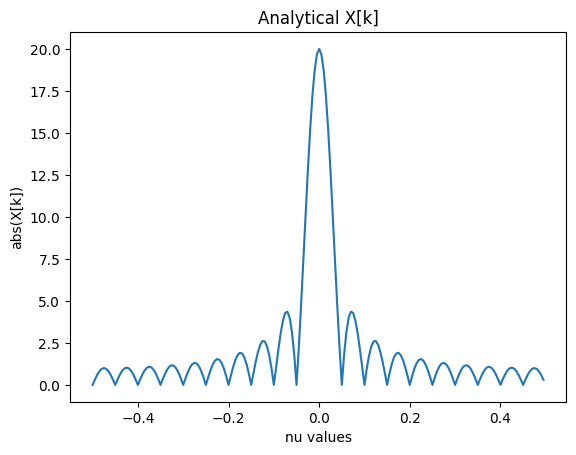

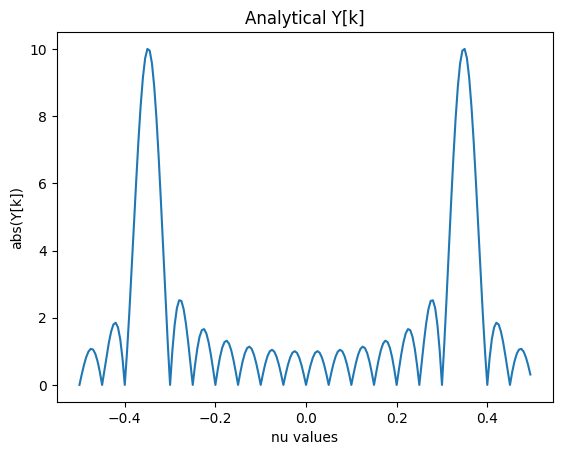

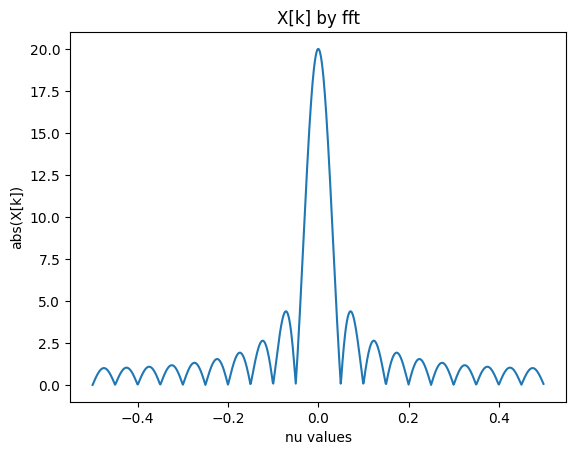

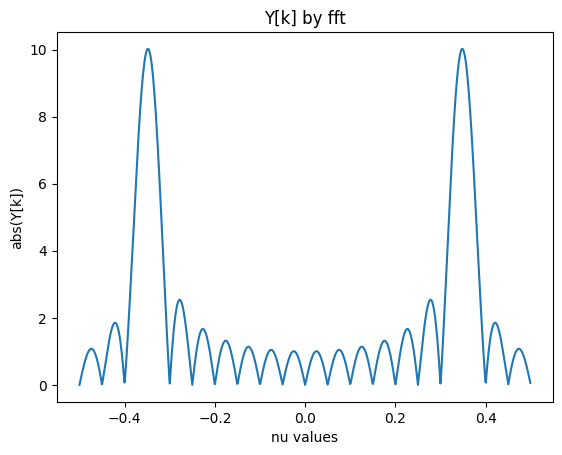

In [77]:
task_1_1()

## Задача 1.2. Симметрия ДВПФ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |


Создайте произвольную действительную последовательность отсчетов $x[k]$ длиной $N$ отсчетов. Постройте с помощью компьютерного моделирования графики следующих функций  для частот $\nu \in [-0.5, \; 0.5]$:
* модуль ДВПФ $|X(\nu)|$,
* фазовая часть ДВПФ $\varphi(\nu)=\angle X(\nu)$,
* действительная часть ДВПФ $\text{Re } X(\nu)$,
* мнимая  часть ДВПФ $\text{Im } X(\nu)$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты.

In [78]:
def task_1_2():
    N = 20
    x_k = np.random.rand(N)

    nu, x_k_dtft = dtft(x_k)
    plt.plot(nu, abs(x_k_dtft))
    plt.title("abs(X[k])(nu)")
    plt.xlabel("nu")
    plt.ylabel("abs(X[k])")
    plt.show()

    plt.plot(nu, np.angle(x_k_dtft))
    plt.title("angle(X[k])(nu)")
    plt.xlabel("nu")
    plt.ylabel("angle(X[k])")
    plt.show()

    plt.plot(nu, np.real(x_k_dtft))
    plt.title("real(X[k])(nu)")
    plt.xlabel("nu")
    plt.ylabel("real(X[k])")
    plt.show()

    plt.plot(nu, np.imag(x_k_dtft))
    plt.title("imag(X[k])(nu)")
    plt.xlabel("nu")
    plt.ylabel("imag(X[k])")
    plt.show()

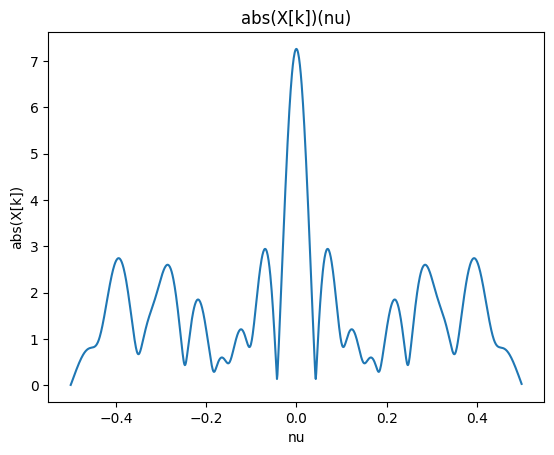

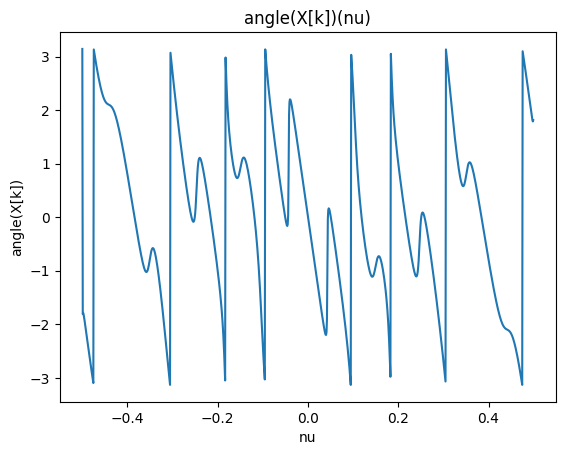

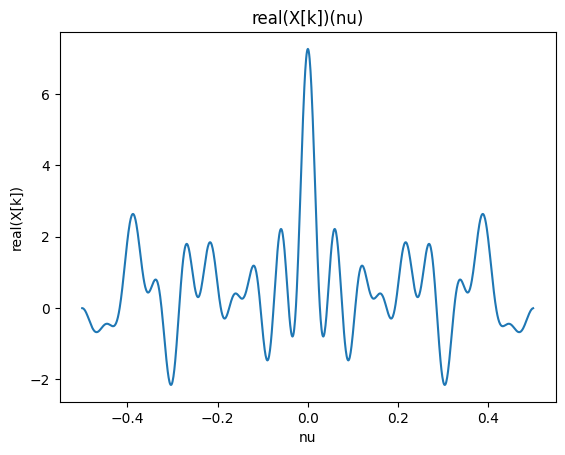

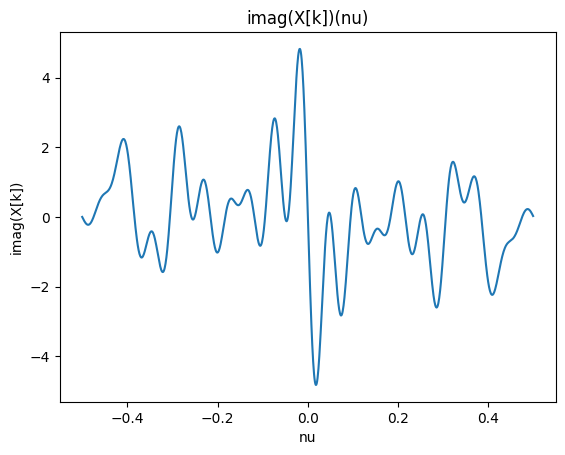

In [79]:
task_1_2()

# Модуль 2. Свойства ДПФ.




## Задача 2.1. Циклический сдвиг ДПФ

| Варианты: |  $x[k]$  | $n_0$ |  $l$  |
|:---------:|:--------:|:----:|:-----:|
|**1**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;2.0\;\;3.3\}$$|  -3  |  6  |
|**2**|$$\{\underbrace{3.8}_{k=0}\;\;8.3\;\;0.1\;\;9.1\;\;1.5\;\;10.0\;\;5.1\;\;1.9\}$$|  4  |  8 |
|**3**|$$\{\underbrace{2.8}_{k=0}\;\;0\;\;4.6\;\;0\;\;0.9\;\;0\;\;9.0\;\;0\;\;6.4\;\;0\;\;8.2\;\;0\}$$|  3  |  12  |
|**4**|$$\{\underbrace{2.8}_{k=0} \;\;4.6\;\;0.9\;\;3.8\;\;5.0\;\;1.7\}$$|  3  |  6  |
|**5**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;3.0\;\;2.3\;\;5.3\;\;2.1\}$$| -4  |  8  |
|**6**|$$\{\underbrace{3.8}_{k=0}\;\;0\;\;8.3\;\;0\;\;9.1\;\;0\;\;1.9\;\;0\}$$|  -2  |  8  |
|**7**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.3\;\;0.4\;\;0.5\;\;0.6\;\;0.7\;\;0.8\}$$|  -5  |  8  |
|**8**|$$\{\underbrace{0.8}_{k=0}\;\;0.7\;\;0.6\;\;0.5\;\;0.4\;\;0.3\;\;0.2\;\;0.1\}$$|  5  |  8  |
|**9**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.4\;\;0.8\;\;1.6\;\;3.2\;\;6.4\;\;12.8\}$$|  7  |  8  |
|**10**|$$\{\underbrace{12.8}_{k=0}\;\;6.4\;\;3.2\;\;1.6\;\;0.8\;\;0.4\;\;0.2\;\;0.1\}$$|  -7  |  8  |

Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[(n+n_0) \mod l],$


1) Вычислите аналитически последовательность $y[k]$ без непосредственного вычисления ДПФ $x[k]$, используя свойства ДПФ.

2) Проведедите моделирование в Python. 
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Осуществите циклический сдвиг $X[n]$ (```np.roll(X, n0)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

In [104]:

def task_2_1():
    n_0_7 = -5
    variant_7 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
    N = len(variant_7)
    k_values = np.arange(N)
    x = np.array(variant_7)
    # plt.plot(x)
    # plt.title("abs(X[k])(nu)")
    # plt.xlabel("nu")
    # plt.ylabel("abs(X[k])")
    # plt.show()
    x_fft = np.fft.fft(x)
    y_fft = np.roll(x_fft, n_0_7)
    y = np.fft.ifft(y_fft)
    y_analytical = x * np.exp(1j * 2 * np.pi * n_0_7 * k_values / N)
    # plt.plot(np.abs(y))
    # plt.title("abs(y[k])(nu)")
    # plt.xlabel("nu")
    # plt.ylabel("abs(y[k])")
    # plt.show()

    # plt.plot(np.abs(y_analytical))
    # plt.title("abs(y[k])(nu)")
    # plt.xlabel("nu")
    # plt.ylabel("abs(y[k])")
    # plt.show()
    print(f"got equal from formula and forward method {np.allclose(y, y_analytical)}")
    print(y)
    print(y_analytical)
    # plt.plot(np.angle(y))
    # plt.show()


In [105]:
task_2_1()

got equal from formula and forward method True
[ 0.1       +0.j         -0.14142136+0.14142136j  0.        -0.3j
  0.28284271+0.28284271j -0.5       +0.j          0.42426407-0.42426407j
  0.        +0.7j        -0.56568542-0.56568542j]
[ 1.00000000e-01+0.00000000e+00j -1.41421356e-01+1.41421356e-01j
  9.18485099e-17-3.00000000e-01j  2.82842712e-01+2.82842712e-01j
 -5.00000000e-01-3.06161700e-16j  4.24264069e-01-4.24264069e-01j
 -1.88638936e-15+7.00000000e-01j -5.65685425e-01-5.65685425e-01j]


## Задача 2.2. Энергия и мощность дискретного сигнала.

| Варианты:|$$X[0]$$| $X[1]$ | $X[2]$ | $X[3]$ | $X[4]$ | $X[5]$ |$$X[6]$$|
|:--------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **2**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **3**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **4**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |
|  **5**  |  11  | $$-4-5j$$ | $$8-3j$$ |$$-2+9j$$ |$$-3+8j$$ | $$2-9j$$ |-4 |
|  **6**  |  10  | $$-6+3j$$ | $$6+3j$$ | $$6-1j$$ | $$1-6j$$ | $$9+5j$$ | 5 |
|  **7**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **8**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **9**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **10**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |

Пусть 
$$
X[n]= \sum_{k=0}^{11} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right)
$$
— 12-точечное ДПФ действительной последовательности $x[k]$ и пусть заданы бины ДПФ в соответствии с вариантом.

1) Воспользовавшись свойствами симметрии, определите значения всех отсчетов ДПФ на одном периоде. 

2) Определите среднее арифметическое значение элементов последовательности $x[k]$:
$$\dfrac{1}{N} \sum_{k=0}^{N-1} x[k]$$
 с использованием значения отсчета ДПФ с номером $n=0$.

3) С использованием равенства Парсеваля для ДПФ определить энергию дискретного сигнала $x[k]$

$$ \sum_{k=0}^{N-1} |x[k]|^2 $$

и мощность для его периодического продолжения с периодом 12
$$ \dfrac{1}{N} \sum_{k=0}^{N-1} |x[k]|^2. $$


4) Вычислите обратное ДПФ с помощью функции ```ifft```, а затем энергию и среднее арифметическое для $x[k]$. 
Сравните с результатами, полученными в п.2 и п.3.


In [83]:
def task_2_2():
    variant_7 = [12, -7 - 5j, 1 - 8j, 4 + 3j, 2 + 6j, 4 - 4j, 0]
    len_array = len(variant_7)
    full_len = 2 * (len_array - 1)
    X_n = np.zeros(full_len, dtype=np.complex64)
    X_n[0 : len_array] = np.array(variant_7)
    for i in range(1, len_array):
        X_n[full_len - i] = np.conj(variant_7[i])

    print(f"X_n on full length: {X_n}")

    avg_from_fft = X_n[0] / full_len
    energy_from_fft = np.sum(np.square(np.abs(X_n))) / full_len
    power_from_fft = energy_from_fft / full_len
    
    print(f"avg from fft {avg_from_fft}, energy from fft {energy_from_fft}, power from fft {power_from_fft}")
    
    x_k = np.fft.ifft(X_n)
    print(f"x_k: {x_k}")
    avg_from_ifft = np.average(x_k)
    energy_from_ifft = np.sum(np.square((x_k)))
    power_from_ifft = energy_from_ifft / full_len
    print(f"avg from ifft {avg_from_ifft}, energy from ifft {energy_from_ifft}, power from ifft {power_from_ifft}")



In [82]:
task_2_2()

X_n on full length: [12.+0.j -7.-5.j  1.-8.j  4.+3.j  2.+6.j  4.-4.j  0.+0.j  4.+4.j  2.-6.j
  4.-3.j  1.+8.j -7.+5.j]
avg from fft (1+0j), energy from fft 51.33333206176758, power from fft 4.277777671813965
x_k: [ 1.6666667 +0.j -0.13237143+0.j  1.9983969 +0.j  3.1666667 +0.j
 -0.20972173+0.j  2.465705  +0.j  1.3333333 +0.j  2.543055  +0.j
  3.5430553 +0.j -0.83333343+0.j -2.3317301 +0.j -1.2097218 +0.j]
avg from ifft (1+0j), energy from ifft (51.333335876464844+0j), power from ifft (4.277778148651123+0j)


## Задача 2.3. ДПФ как коэффициенты разложения по базису


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 12 | 16 | 14 | 16 | 18 | 16 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  7 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  5 |  4 |  2 |  3 |  5 |  4 |  5 |  7 |  5 |  5 |

Вычислите коэффициенты $N$ – точечного ДПФ $X[n]$ для 
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l}\cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при заданных $r_1$ и $r_2$ с помощью
 
 * формулы вычисления ДПФ
 * теоремы смещения для ДПФ 
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$
 * с помощью функции ```fft```
 
 Сравните результаты. Постройте графики для $|X[n]|$, $\angle X[n]$, $\text{Re } X[n]$, $\text{Im }X[n]$.

In [131]:
def plot_stuff(x_arr, arr, arr_name):
    plt.plot(x_arr, np.abs(arr))
    plt.title(f"abs({arr_name})(nu)")
    plt.xlabel(f"nu")
    plt.ylabel(f"abs({arr_name})")
    plt.show()
    
    plt.plot(x_arr, np.angle(arr))
    plt.title(f"angle({arr_name})(nu)")
    plt.xlabel(f"nu")
    plt.ylabel(f"angle({arr_name})")
    plt.show()
    
    plt.plot(x_arr, np.real(arr))
    plt.title(f"real({arr_name})(nu)")
    plt.xlabel(f"nu")
    plt.ylabel(f"real({arr_name})")
    plt.show()
    
    plt.plot(x_arr, np.imag(arr))
    plt.title(f"imag({arr_name})(nu)")
    plt.xlabel(f"nu")
    plt.ylabel(f"imag({arr_name})")
    plt.show()

def task_2_3():
    N = 24
    r_1 = 7
    r_2 = 5
    k_values = np.arange(N)
    cos_values = np.cos(2 * np.pi * r_1 * k_values / N)
    sin_values = np.sin(2 * np.pi * r_2 * k_values / N)
    x = cos_values + sin_values

    # directly from formula
    X_n_formula = np.full(len(x), 0, dtype=np.complex64)
    X_n_formula[r_1] = N * 1 / 2
    X_n_formula[N - r_1] = N * 1 / 2
    X_n_formula[r_2] = -1j * N * 1 / 2
    X_n_formula[N - r_2] = 1j * N * 1 / 2
    nu_values = k_values / N - 0.5
    plot_stuff(nu_values, X_n_formula, "X_n_formula")


    # from DFT move theorem
    spectre_of_ones = np.zeros(N, dtype=np.complex64)
    spectre_of_ones[1:] = np.divide(np.sin(np.pi * k_values[1:]), np.sin(np.pi * k_values[1:] / N)) * np.exp(-1j * (N - 1) * 
                                                                                np.pi * k_values[1:] / N)
    spectre_of_ones[0] = N
    x_from_dft_move = (np.roll(spectre_of_ones, r_1) + np.roll(spectre_of_ones, -r_1) + 
                       1j * np.roll(spectre_of_ones, -r_2) - 1j * np.roll(spectre_of_ones, r_2)) / 2
    x_from_dft_move = np.round(x_from_dft_move, 3)
    print(x_from_dft_move)
    plot_stuff(nu_values, x_from_dft_move, "x_from_dft_move")


    # as coefficients of basis:
    cos_basis_coeffs = (np.exp(2 * np.pi * k_values * r_1 / N) + np.exp(2 * np.pi * k_values * (N - r_1) / N)) / 2
    sin_basis_coeffs = -1j * (np.exp(2 * np.pi * k_values * r_2 / N) - np.exp(2 * np.pi * k_values * (N - r_2) / N)) / 2
    X_n_basis = np.full(len(x), 0, dtype=np.complex64)
    X_n_basis[r_1] = N * 1 / 2
    X_n_basis[N - r_1] = N * 1 / 2
    X_n_basis[r_2] = -1j * N * 1 / 2
    X_n_basis[N - r_2] = 1j * N * 1 / 2
    plot_stuff(nu_values, X_n_basis, "X_n_basis")


    x_fft = np.fft.fft(x)
    plot_stuff(nu_values, x_fft, "x_fft")

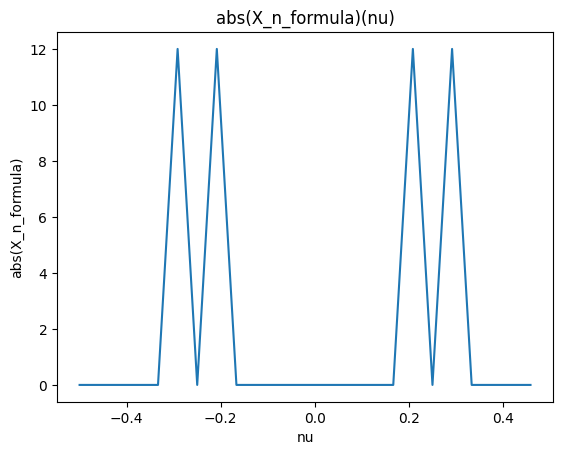

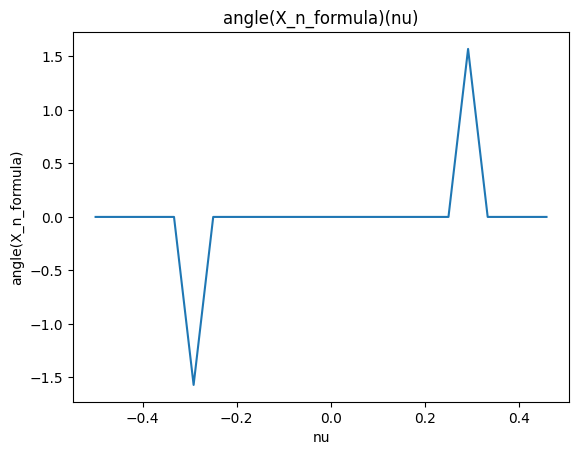

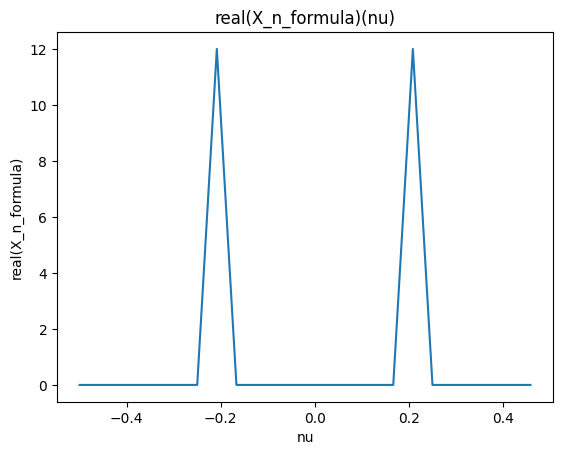

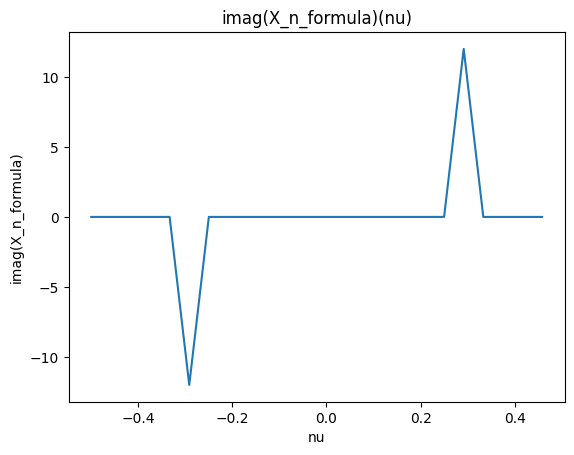

[-0. -0.j -0. -0.j  0. -0.j -0. -0.j -0. -0.j  0.-12.j  0. -0.j 12. -0.j
 -0. -0.j  0. -0.j  0. +0.j  0. -0.j  0. -0.j  0. -0.j  0. +0.j  0. -0.j
  0. -0.j 12. +0.j  0. +0.j -0.+12.j -0. -0.j -0. -0.j  0. -0.j -0. -0.j]


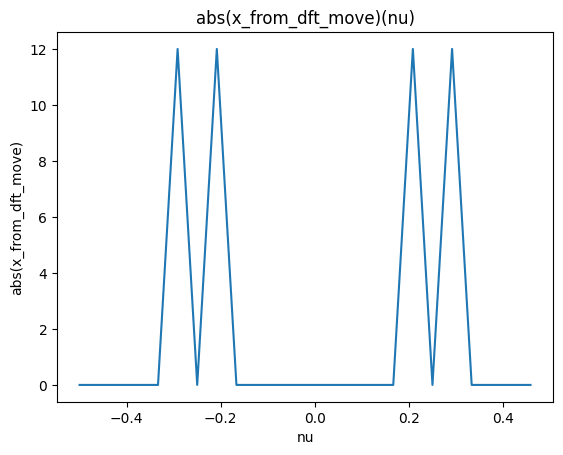

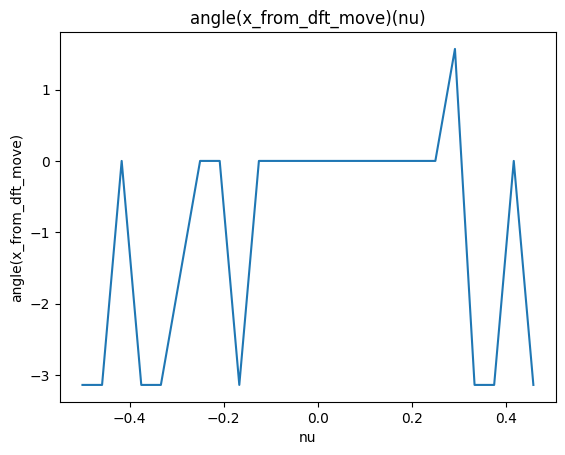

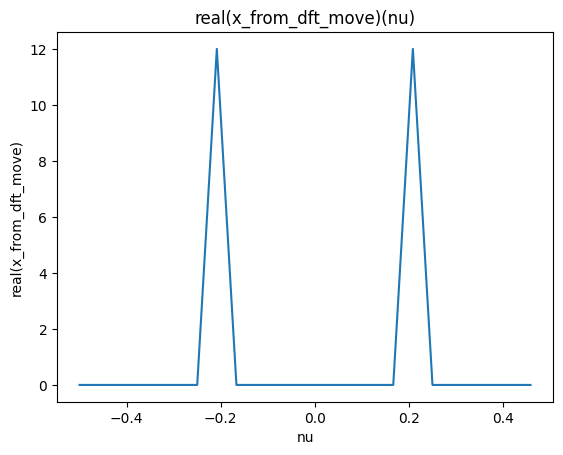

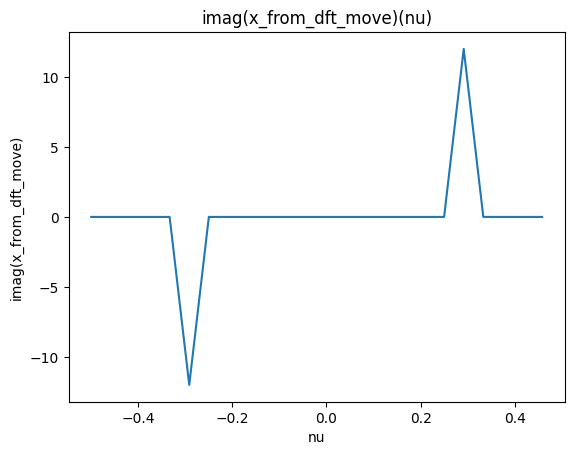

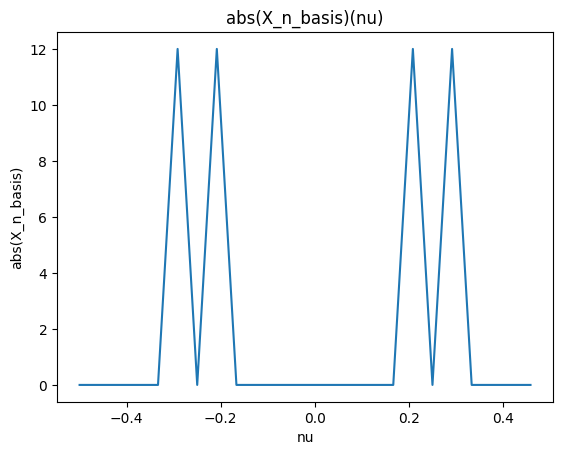

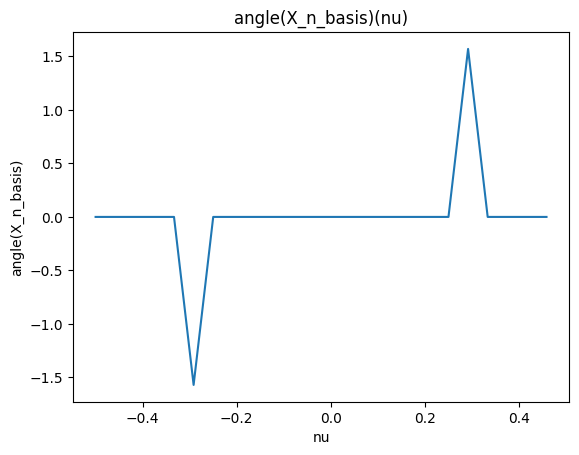

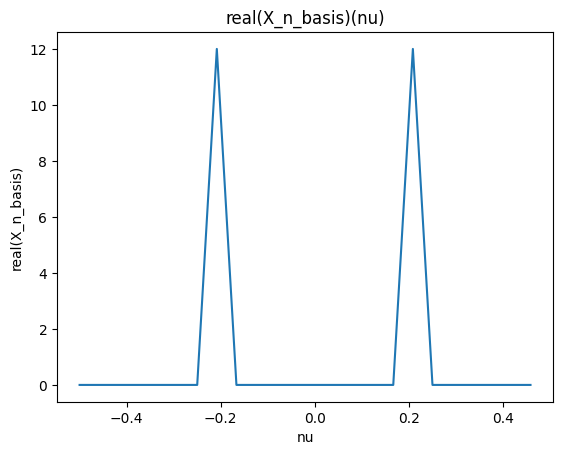

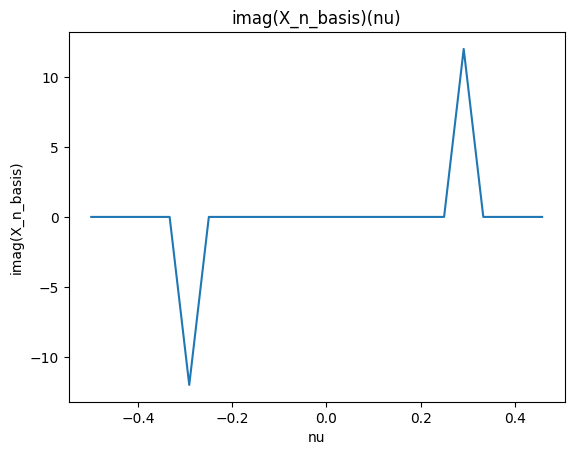

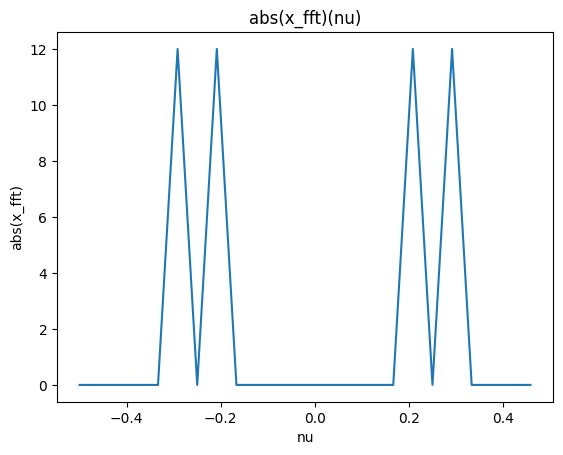

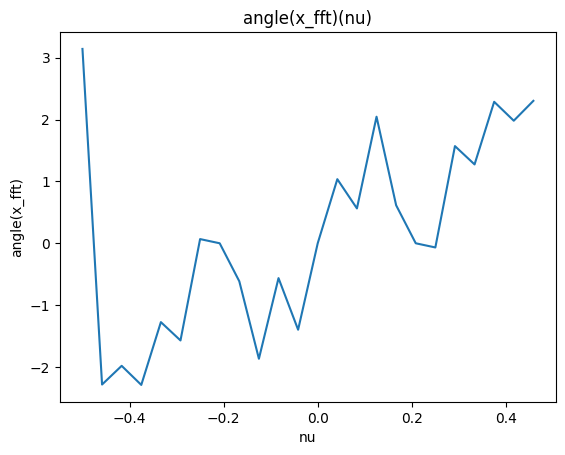

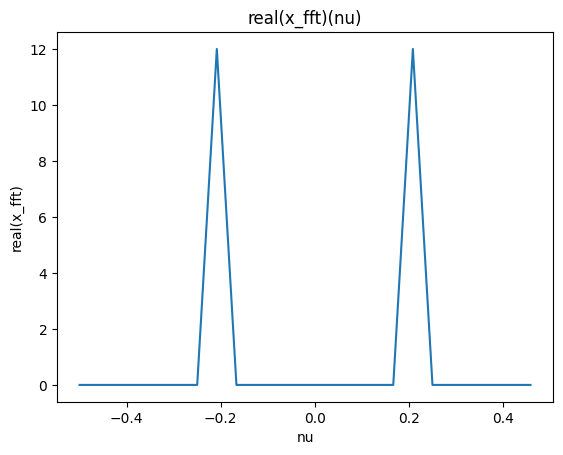

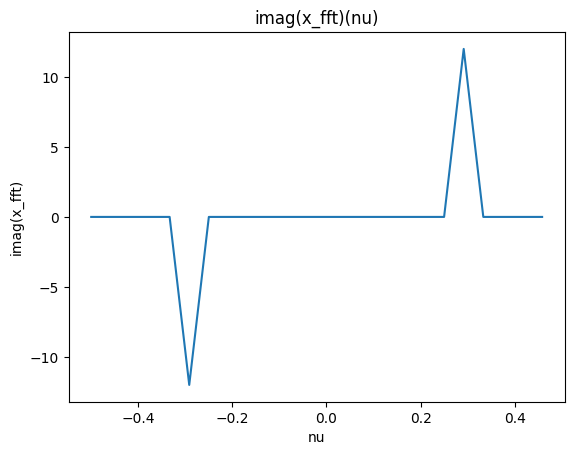

In [132]:
task_2_3()

# Модуль 3. Связь между ДПФ и ДВПФ. Частотная ось ДПФ.

## Задача 3.1. Связь ДПФ и ДВПФ для последовательностей конечной длительности.  
##Прямоугольное окно длиной N

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 20 | 18 | 16 | 14 | 12 | 20 | 24 | 30 | 32 |
  
Дана $N$-точечная последовательность $w[k]=\sum_{m=0}^{N-1} \mathbf{1} [k-m]$.  

* Изобразить график последовательности $w[k]$ средствами Python
* Вычислить с помощью `fft` ДПФ данной последовательности. Построить график.
* Дополнить последовательность $w[k]$ до $2N$ отсчетов нулями:
$$
y[k]=\left\{\begin{array}{l}
1, \text{при }  0 \le k \le N-1;
\\
0, \text{при } N \le k \le 2N-1.
\end{array}\right.
$$
При том изменяется только учитываемая длительность последовательности, влияющая на число отсчетов ДПФ.    
Сравнить результат работы `fft(w, 2*N)` c ДПФ для $y[k]$. Построить графики. 

* Повторить предыдущий пункт для последовательности $w[k]$ дополненой нулями до $4N$ отсчетов.

* Вычислить аналитически ДВПФ с помощью формулы прямого преобразования:
$$ W(\nu)= \sum_{k=-\infty}^{\infty} w[k]\exp(-j2\pi \nu k) $$  
Сравнить результат с работой функции `fft(w, 1024)`

* Построить график модуля ДВПФ $|W(\nu)|$ на отрезке $[-0.5, 0.5]$, используя функцию `fftshift`.



In [150]:
def task_3_1():
    N = 20
    w = np.ones(N)
    plt.stem(w)
    plt.title("w[k]")
    plt.xlabel("k")
    plt.ylabel("w[k]")
    plt.show()
    plot_dtft(w, w.size, True, "fft(w[k])", "nu", "abs(w[k])")
    y = np.concatenate((w, np.zeros(N)))
    plot_dtft(y, y.size, True, "fft(y[k])", "nu", "abs(y[k])")
    plot_dtft(w, w.size * 2, True, "fft(w[k]) with 2 * N points", "nu", "abs(w[k])")
    w_4N = np.concatenate((w, np.zeros(3 * N)))
    plot_dtft(w_4N, w_4N.size, True, "fft(w[4_N])", "nu", "abs(w[k])")
    plot_dtft(w, 4 * N, True, "fft(w[k]) with 4 * N points", "nu", "abs(w[k])")


    many_k = np.arange(-0.5, 0.5, 0.001)
    W_dtft = np.exp(-1j * np.pi * many_k * (N - 1)) * np.sin(np.pi * N * many_k) / np.sin(np.pi * many_k)
    nu, w_many_dft = dtft(w, 5 * N)
    plt.stem(nu, np.abs((w_many_dft)))
    plt.plot(many_k, np.abs(W_dtft))
    plt.title("DTFT of w")
    plt.xlabel("nu")
    plt.ylabel("abs(DTFT(w))")
    plt.show()

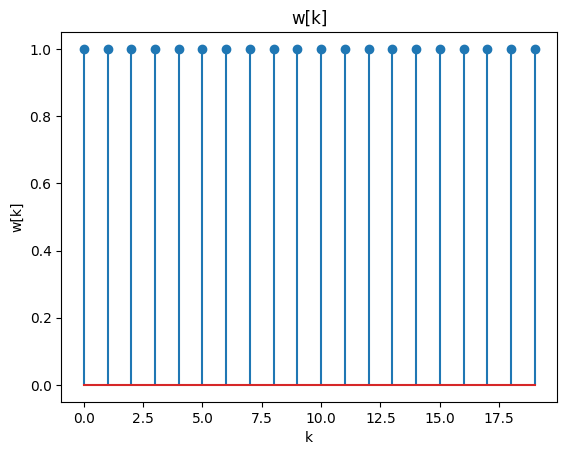

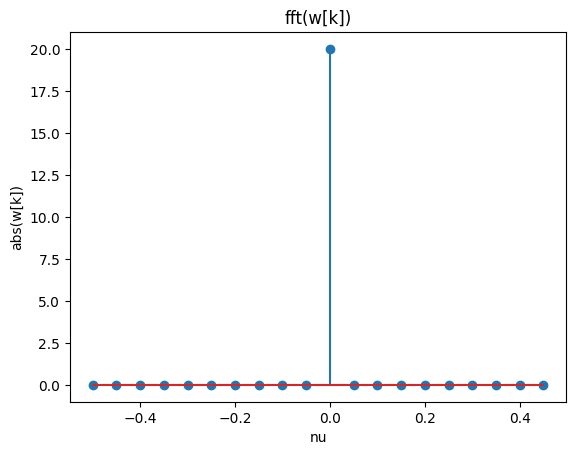

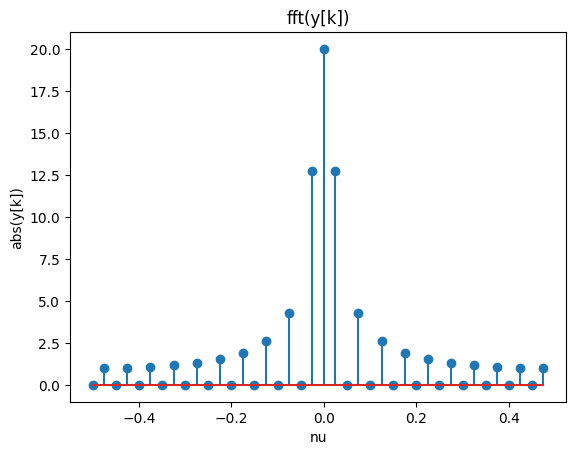

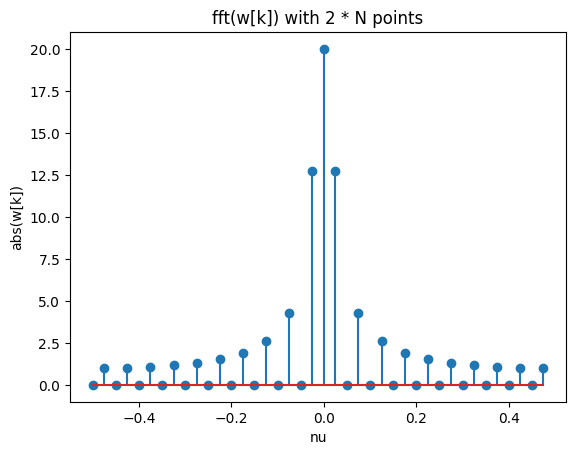

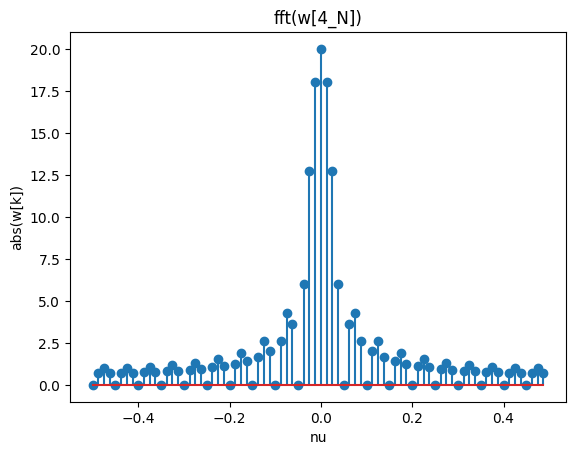

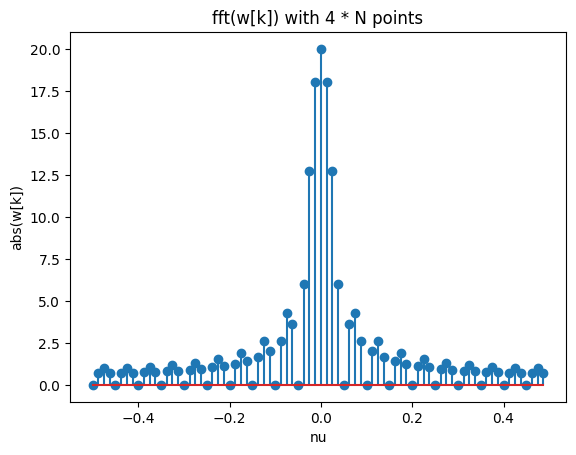

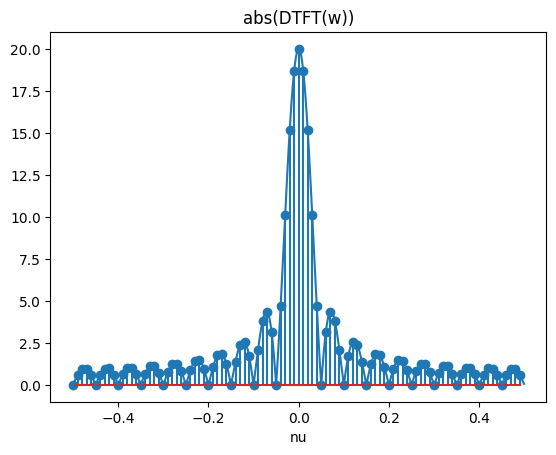

In [151]:
task_3_1()

## Задача 3.2. Связь между ДВПФ и ДПФ для периодических последовательностей. 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |  5 |  7 |  5 |  5 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$ 
* Вычислите аналитически ДВПФ
* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов). 

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

In [137]:
def task_3_2():
    N = 20
    r_1 = 3
    r_2 = 7

    x_length = 12 * 10 ** 6
    arange_vals = np.arange(x_length)
    sin_arguments = 2 * np.pi * r_1 * arange_vals / N 
    cos_arguments = 2 * np.pi * r_2 * arange_vals / N 

    x = np.sin(sin_arguments) + np.cos(cos_arguments)
    nu, x_fft = plot_dtft(x / N, N, title="x_fft", x_label="nu", y_label="abs(x_fft)")
    plt.plot(nu, np.real(x_fft))
    plt.title("real of x_fft")
    plt.xlabel("nu")
    plt.ylabel("real(x_fft)")
    plt.show()
    plt.plot(nu, np.imag(x_fft))
    plt.title("imag of x_fft")
    plt.xlabel("nu")
    plt.ylabel("imag(x_fft)")
    plt.show()
    ampl = abs(x_fft / N)
    indices = (np.argpartition(ampl, -4)[-4:] - N / 2)/ N
    print(indices)

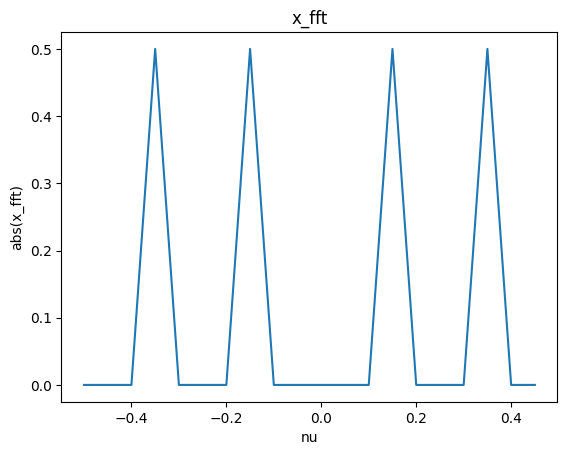

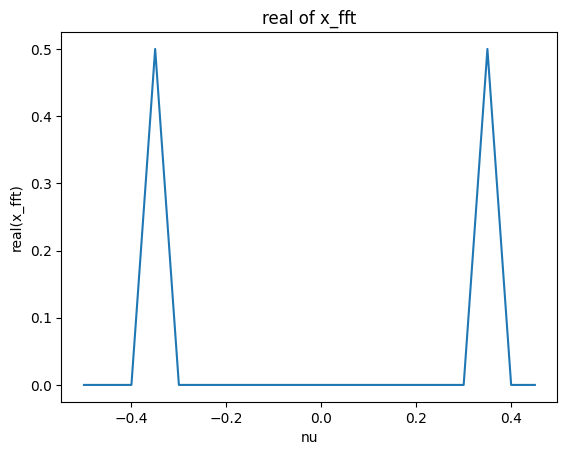

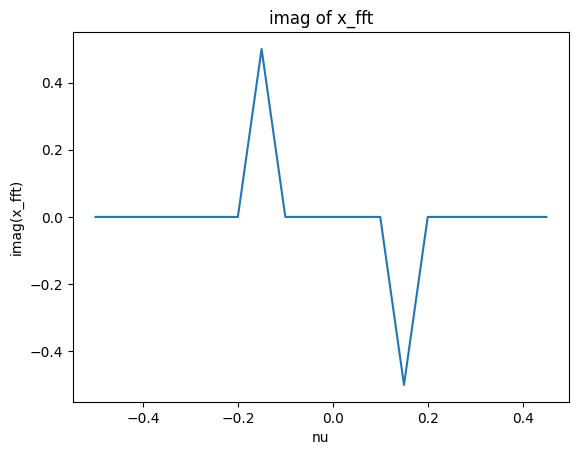

[-0.15 -0.35  0.15  0.35]


In [138]:
task_3_2()

## Задача 3.3. Сравнение вычислительной эффективности

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |   512 |   512 |   512 |   256 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 | 32768 | 65536 | 32768 | 32768 |

Дана $N$-точечная последовательность отсчетов
$$ x[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую, 
* используя БПФ `fft(x, P)`. 

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|X(\nu)|$.

In [58]:
def evaluate_by_formula(x, P):
    # mem_prealloc = np.zeros((x.size, P))
    # mem_prealloc_2 = np.zeros((x.size, P), dtype=np.complex128)
    # mem_prealloc_3 = np.zeros(P, dtype=np.complex128)
    start = time.perf_counter()
    # k_values = np.arange(0, x.size)
    k_values_expanded = np.expand_dims(np.arange(0, x.size), 1)

    # nu_values = np.arange(0, 1, 1 / P)
    nu_values_expanded = np.expand_dims(np.arange(0, 1, 1 / P), 0)

    k_nu_outer = np.matmul(k_values_expanded, nu_values_expanded)
    exp_mat = np.exp(-1j * 2 * np.pi * k_nu_outer)


    X = np.matmul(x, exp_mat)
    # for i in range(P):
    #     nu = i / P
    #     exp_values = np.exp(-1j * 2 * np.pi * nu * k_values)
    #     prod_arr = np.dot(x, exp_values)
    #     X[i] = np.sum(prod_arr)
    end = time.perf_counter()
    time_passed = end - start
    print(f"formula evaluating took {time_passed}")
    return X

def task_3_3():
    N = 512
    P = 32768
    n_0 = N / 16
    k_values = np.arange(0, N)
    x = np.sin(2 * np.pi * k_values * n_0 / N)

    start = time.perf_counter()
    fft_x = np.fft.fft(x, P)
    end = time.perf_counter()
    time_passed_fft = end - start
    print(f"fft evaluating took {time_passed_fft}")
    formula_x = evaluate_by_formula(x, P)
    diff = fft_x - formula_x
    abs_diff = np.abs(diff)
    abs_val = np.max(np.abs(formula_x))
    print(f"abs val of ||.||_1 is {max(abs_diff)}, its relative val: {max(abs_diff) / abs_val}")
    print(np.allclose(fft_x, formula_x))
    plt.plot(np.arange(-0.5, 0.5, 1 / formula_x.size), np.fft.fftshift(np.abs(fft_x)))
    plt.show()

fft evaluating took 0.0004672270006267354
formula evaluating took 0.40046160600468284
abs val of ||.||_1 is 1.8736784254371638e-11, its relative val: 7.319056349363922e-14
True


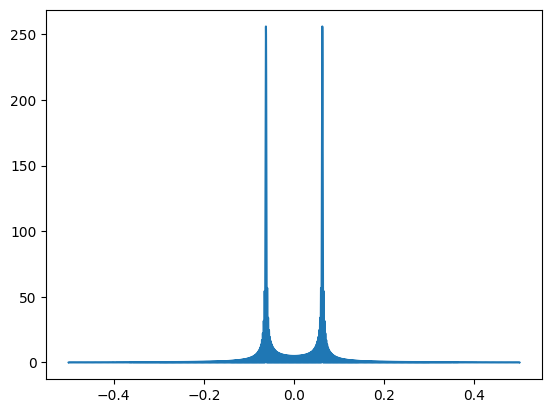

In [59]:
task_3_3()

## Задача 3.4. Частотная ось ДПФ (соответствие номеров отсчетов и частот).

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`vibraphone.wav`|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|`flute.wav`|


| Варианты: |    7 |    8 |    9 |    10 |
|:---------:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|

Для аудиозаписи вашего варианта:
* указать шаг и частоту дискретизации; 
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.

In [11]:
def task_3_4():
    fs, signal=scipy.io.wavfile.read('./wav_files/clarinet.wav')
    delta_t = 1 / fs
    time_delay = 50097
    time_delta = 1700
    # time_delay = 25000
    # time_delta = int(signal.size / 250)
    plot_sub_arr = np.arange(time_delay ,time_delay + time_delta)
    to_plot = signal[plot_sub_arr]
    print(fs, delta_t, len(signal))
    plt.plot(to_plot)
    plt.title("Part of signal")
    plt.xlabel("x")
    plt.ylabel("signal")
    plt.show()

    nu, signal_fft = plot_dtft(to_plot, title = "fft of signal", x_label="nu", y_label="abs(fft(signal))")
    print(np.argmax(np.abs(signal_fft)))
    ampl = abs(signal_fft)
    print(ampl.size)
    indices = (np.argpartition(ampl, -2)[-2:])
    # print(indices)
    indices = (indices - signal_fft.size / 2)/ signal_fft.size
    print(indices * fs)


44100 2.2675736961451248e-05 183808


/tmp/ipykernel_24656/440493142.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, signal=scipy.io.wavfile.read('./wav_files/clarinet.wav')


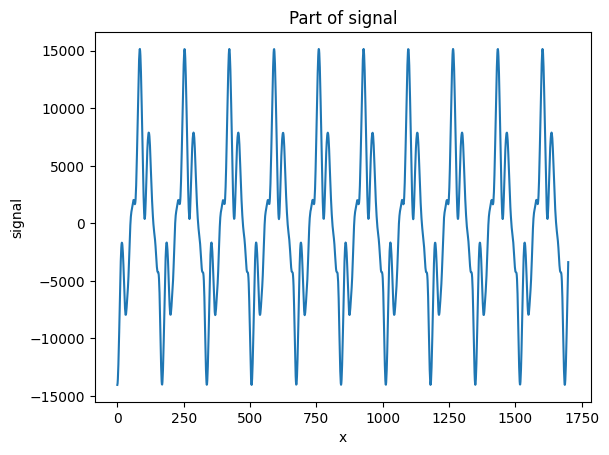

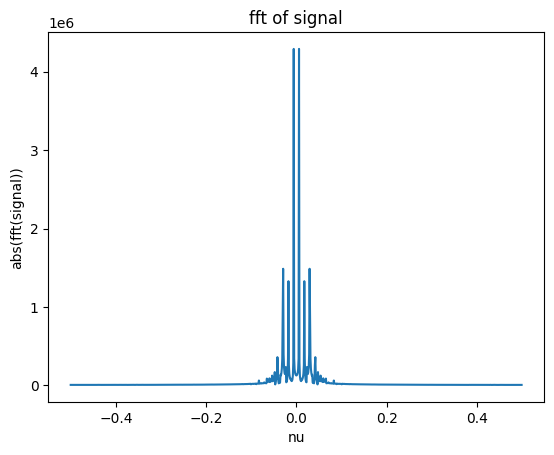

506
1024
[ 258.3984375 -258.3984375]


In [12]:
task_3_4()